<a href="https://colab.research.google.com/github/justSammy1604/test-repository/blob/main/Clustering_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets._samples_generator import make_blobs
import matplotlib.pyplot as plt

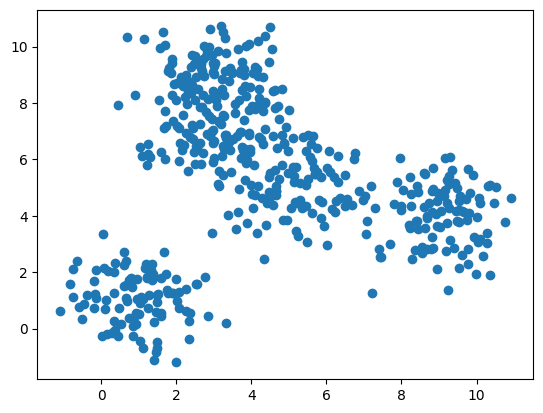

In [ ]:
centers = [[1,1],[5,5],[3,9],[3,7],[9,4]]
X,_ = make_blobs(n_samples=500,centers=centers,cluster_std=1)

plt.scatter(X[:,0],X[:,1])
plt.show()

[[3.56758931 7.28739434]
 [7.10401294 4.595949  ]
 [1.01812583 1.08553622]]
Number of estimated clusters are  3
['r.', 'g.', 'b.', 'c.', 'k.', 'w.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'w.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'w.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'w.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'w.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'w.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'w.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'w.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'w.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'w.', 'y.', 'm.']
[2 0 2 0 2 0 1 2 0 0 1 0 2 1 2 0 0 1 0 0 0 0 2 1 0 1 1 1 0 2 2 1 1 0 2 0 1
 0 0 2 0 1 0 1 0 0 0 2 0 1 2 0 2 0 1 0 0 2 0 1 1 0 2 1 0 0 0 1 1 2 1 1 0 0
 2 2 0 2 0 1 0 2 0 0 1 0 1 2 1 1 1 0 0 2 1 0 0 0 0 1 2 0 1 1 0 0 2 1 1 1 0
 0 0 1 1 0 0 1 1 1 2 2 1 0 1 1 0 1 0 0 0 1 1 1 1 2 1 0 1 2 1 2 0 2 0 2 0 1
 0 2 1 1 0 1 1 0 2 2 0 2 2 1 0 0 1 2 1 2 1 2 0 0 0 0 1 2 0 2 1 2 1 0 0 0 0
 0 2 2 1 0 0 1 1 1 0 1 0 0 0 0 0

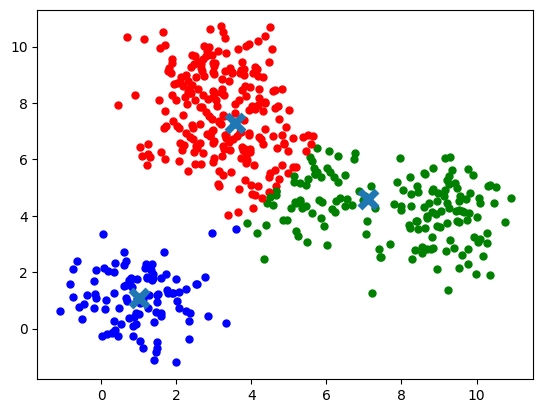

In [ ]:
from matplotlib import markers
#Using Mean Shift from Sklearn
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)

n_clusters = len(np.unique(labels))

print("Number of estimated clusters are ", n_clusters)

colors = 10*['r.','g.','b.','c.','k.','w.','y.','m.']

print(colors)
print(labels)

for i in range(len(X)):
  plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker='x',s=150, linewidths=5,zorder=10)

plt.show()

>KMeans Algorithm Where it Produces undesirable clusters


In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

n_samples = 6000
random_state = 180

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X,y = make_blobs(n_samples=n_samples,random_state=random_state)

X_aniso = np.dot(X,transformation)

X_varied,y_varied = make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.6, 0.6],random_state=random_state)

X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))

y_filtered = [0]* 500 + [1] * 100 + [2] * 10

>Visualizations Part

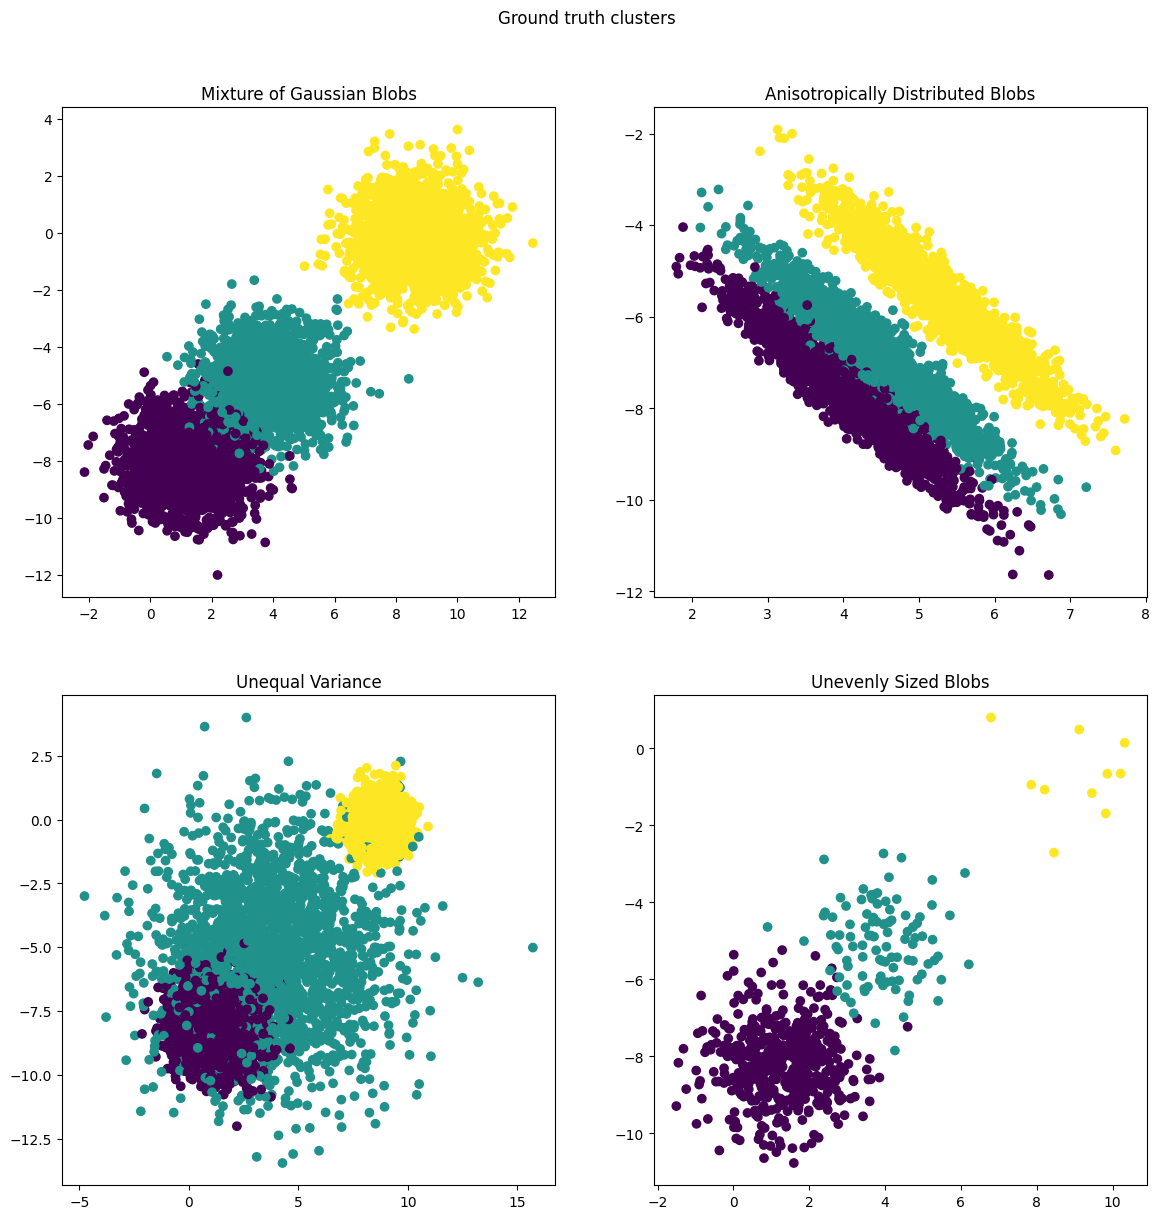

In [ ]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(14,14))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mixture of Gaussian Blobs")

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Unequal Variance")

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

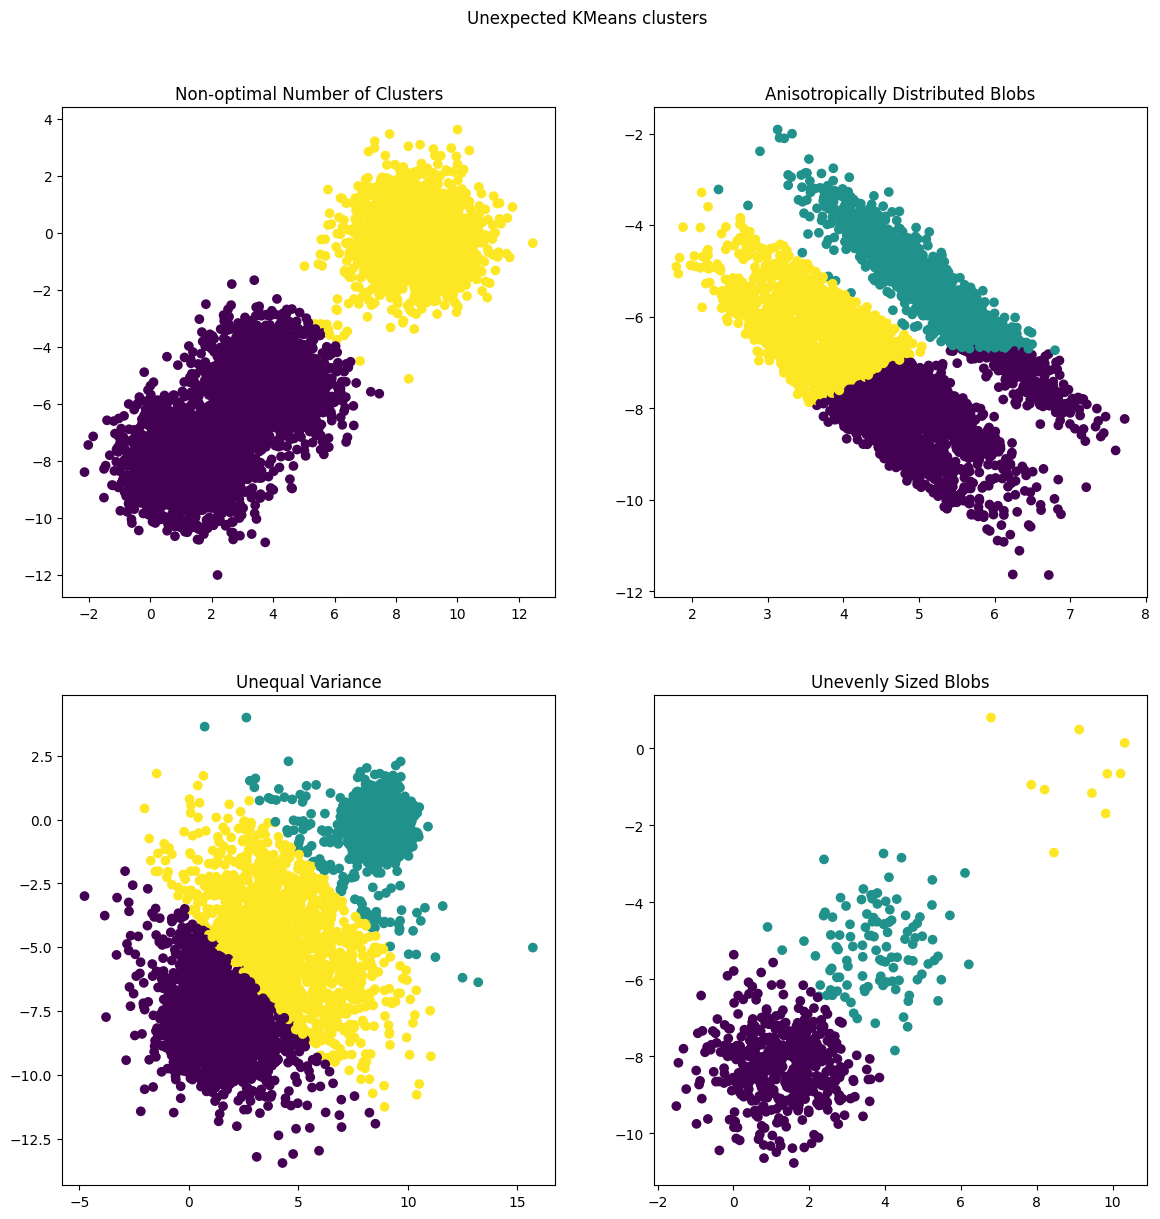

In [ ]:
from sklearn.cluster import KMeans
common_params = {
    'n_init': 'auto',
    'random_state': random_state
}

fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(14,14))

y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Non-optimal Number of Clusters")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_varied)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_filtered)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Unexpected KMeans clusters").set_y(0.95)
plt.show()

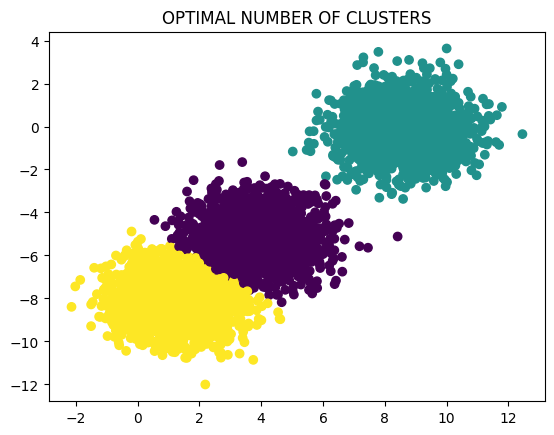

In [ ]:
y_pred = KMeans(n_clusters=3,**common_params).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.title("OPTIMAL NUMBER OF CLUSTERS")
plt.show()

##Mini Batch KMeans Algorithm for Text Data

In [ ]:
from sklearn.utils.multiclass import unique_labels
import numpy as np
from sklearn.datasets import fetch_20newsgroups

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",]

dataset = fetch_20newsgroups(
    remove=("headers","footers","quotes"),
    subset="all",
    categories=categories,
    shuffle=True,
    random_state=40
)

labels = dataset.target
unique_labels,category_size = np.unique(labels,return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(dataset.data)} documents - {true_k} categories")

3387 documents - 4 categories


Quantifying the Quality of results

In [ ]:
from collections import defaultdict
from time import time
from sklearn import metrics

In [ ]:
evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(
    max_df = 0.5,
    min_df = 5,
    stop_words = "english"
)
T0 = time()
X_tfidf = vec.fit_transform(dataset.data)

print(f"Vectorization done in {time()-T0:.3f} secs")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

Vectorization done in 0.590 secs
n_samples: 3387, n_features: 7929


###Clustering Sparse Data With KMeans

In [ ]:
from sklearn.cluster import KMeans

for seed in range(5):
    kmeans = KMeans(
        n_clusters=true_k,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print()
print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)

Number of elements assigned to each cluster: [1985  413  676  313]
Number of elements assigned to each cluster: [   1    1    1 3384]
Number of elements assigned to each cluster: [ 411  402 1866  708]
Number of elements assigned to each cluster: [ 767  384  140 2096]
Number of elements assigned to each cluster: [1918  664  475  330]



NameError: ignored

###Affinity Propogation For looking up Stock Markets

In [ ]:
import sys
import numpy as np
import pandas as pd

symbol_dict = {
    "TOT": "Total",
    "XOM": "Exxon",
    "CVX": "Chevron",
    "COP": "ConocoPhillips",
    "VLO": "Valero Energy",
    "MSFT": "Microsoft",
    "IBM": "IBM",
    "TWX": "Time Warner",
    "CMCSA": "Comcast",
    "CVC": "Cablevision",
    "YHOO": "Yahoo",
    "DELL": "Dell",
    "HPQ": "HP",
    "AMZN": "Amazon",
    "TM": "Toyota",
    "CAJ": "Canon",
    "SNE": "Sony",
    "F": "Ford",
    "HMC": "Honda",
    "NAV": "Navistar",
    "NOC": "Northrop Grumman",
    "BA": "Boeing",
    "KO": "Coca Cola",
    "MMM": "3M",
    "MCD": "McDonald's",
    "PEP": "Pepsi",
    "K": "Kellogg",
    "UN": "Unilever",
    "MAR": "Marriott",
    "PG": "Procter Gamble",
    "CL": "Colgate-Palmolive",
    "GE": "General Electrics",
    "WFC": "Wells Fargo",
    "JPM": "JPMorgan Chase",
    "AIG": "AIG",
    "AXP": "American express",
    "BAC": "Bank of America",
    "GS": "Goldman Sachs",
    "AAPL": "Apple",
    "SAP": "SAP",
    "CSCO": "Cisco",
    "TXN": "Texas Instruments",
    "XRX": "Xerox",
    "WMT": "Wal-Mart",
    "HD": "Home Depot",
    "GSK": "GlaxoSmithKline",
    "PFE": "Pfizer",
    "SNY": "Sanofi-Aventis",
    "NVS": "Novartis",
    "KMB": "Kimberly-Clark",
    "R": "Ryder",
    "GD": "General Dynamics",
    "RTN": "Raytheon",
    "CVS": "CVS",
    "CAT": "Caterpillar",
    "DD": "DuPont de Nemours",
}

symbols,names = np.array(sorted(symbol_dict.items())).T

quotes=[]

for sym in symbols:
  print("Fetching quote history for %r" %sym, file=sys.stderr)
  url=(
      "https://raw.githubusercontent.com/scikit-learn/examples-data/"
        "master/financial-data/{}.csv"
  )
  quotes.append(pd.read_csv(url.format(sym)))

close_prices = np.vstack([q['close'] for q in quotes])
open_prices = np.vstack([q['open'] for q in quotes])

# The daily Variation is given by
Variation = close_prices - open_prices

Fetching quote history for 'AAPL'
Fetching quote history for 'AIG'
Fetching quote history for 'AMZN'
Fetching quote history for 'AXP'
Fetching quote history for 'BA'
Fetching quote history for 'BAC'
Fetching quote history for 'CAJ'
Fetching quote history for 'CAT'
Fetching quote history for 'CL'
Fetching quote history for 'CMCSA'
Fetching quote history for 'COP'
Fetching quote history for 'CSCO'
Fetching quote history for 'CVC'
Fetching quote history for 'CVS'
Fetching quote history for 'CVX'
Fetching quote history for 'DD'
Fetching quote history for 'DELL'
Fetching quote history for 'F'
Fetching quote history for 'GD'
Fetching quote history for 'GE'
Fetching quote history for 'GS'
Fetching quote history for 'GSK'
Fetching quote history for 'HD'
Fetching quote history for 'HMC'
Fetching quote history for 'HPQ'
Fetching quote history for 'IBM'
Fetching quote history for 'JPM'
Fetching quote history for 'K'
Fetching quote history for 'KMB'
Fetching quote history for 'KO'
Fetching quote h

>Learning a Graph Structure.
We use sparse inverse covariance estimation to find which quotes are correlated conditionally on the others. Specifically, sparse inverse covariance gives us a graph, that is a list of connections. For each symbol, the symbols that it is connected to are those useful to explain its fluctuations.

In [ ]:
from sklearn import covariance

alphas = np.logspace(-1.6,1,num=11)
edge_model = covariance.GraphicalLassoCV(alphas=alphas)

#To standardize the time series: using correlations rather than covariance
#Efficient for structure recovery

X = Variation.copy().T
X /= X.std(axis=0)
edge_model.fit(X)

GraphicalLassoCV(alphas=array([ 0.02511886,  0.04570882,  0.08317638,  0.15135612,  0.27542287,
        0.50118723,  0.91201084,  1.65958691,  3.01995172,  5.49540874,
       10.        ]))

Clustering Using Affinity Propogation

In [ ]:
from sklearn.cluster import affinity_propagation

_,labels = affinity_propagation(edge_model.covariance_,random_state=0)

n_labels = labels.max()

for i in range(n_labels+1):
  print(f"Cluster {i+1}: {','.join(names[labels == i])}")

Cluster 1: Apple,Amazon,Yahoo
Cluster 2: Comcast,Cablevision,Time Warner
Cluster 3: ConocoPhillips,Chevron,Total,Valero Energy,Exxon
Cluster 4: Cisco,Dell,HP,IBM,Microsoft,SAP,Texas Instruments
Cluster 5: Boeing,General Dynamics,Northrop Grumman,Raytheon
Cluster 6: AIG,American express,Bank of America,Caterpillar,CVS,DuPont de Nemours,Ford,General Electrics,Goldman Sachs,Home Depot,JPMorgan Chase,Marriott,McDonald's,3M,Ryder,Wells Fargo,Wal-Mart
Cluster 7: GlaxoSmithKline,Novartis,Pfizer,Sanofi-Aventis,Unilever
Cluster 8: Kellogg,Coca Cola,Pepsi
Cluster 9: Colgate-Palmolive,Kimberly-Clark,Procter Gamble
Cluster 10: Canon,Honda,Navistar,Sony,Toyota,Xerox


###Clustering Using Spectral Clustering Technique

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from skimage.data import coins
from skimage.transform import rescale
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image

ORIG_coins = coins()
# Resize it to 40% of the original size to speed up the processing
# Applying a Gaussian filter for smoothing prior to down-scaling
# reduces aliasing artifacts.
smoothed_coins = gaussian_filter(ORIG_coins,sigma=1)
rescaled_coins = rescale(smoothed_coins,0.5,mode='reflect',anti_aliasing=False)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(rescaled_coins)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta=12
eps=1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# The number of segmented regions to display needs to be chosen manually.
# The current version of 'spectral_clustering' does not support determining
# the number of good quality clusters automatically.
n_regions = 29

Spectral clustering: kmeans, 90.70s
Spectral clustering: discretize, 81.82s
Spectral clustering: cluster_qr, 83.23s


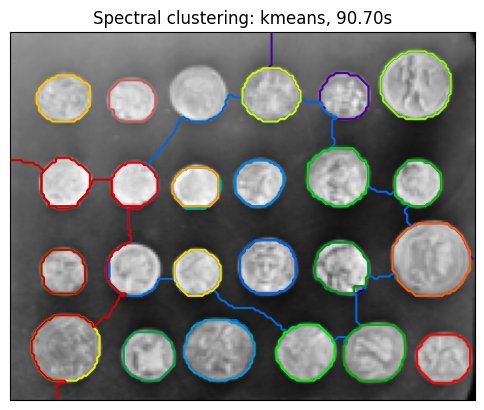

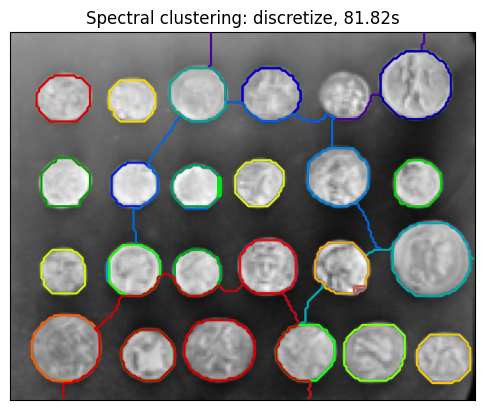

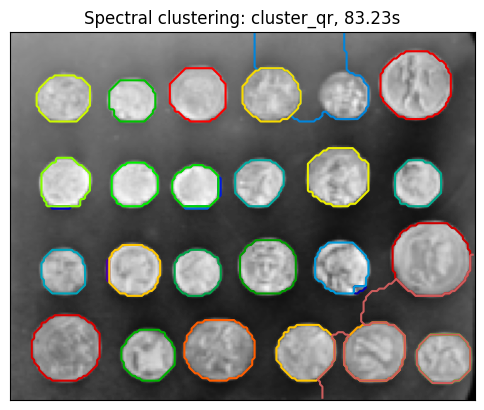

In [ ]:
# Computing a few extra eigenvectors may speed up the eigen_solver.
# The spectral clustering quality may also benetif from requesting
# extra regions for segmentation.
n_regions_plus = 5

for assign_labels in ("kmeans","discretize","cluster_qr"):
  T0 = time.time()
  labels = spectral_clustering(
      graph,
      n_clusters=(n_regions+n_regions_plus),
      eigen_tol = 1e-7,
      assign_labels=assign_labels,
      random_state=45,
  )

  T1=time.time()
  labels = labels.reshape(rescaled_coins.shape)
  plt.figure(figsize=(6,6))
  plt.imshow(rescaled_coins,cmap=plt.cm.gray)

  plt.xticks(())
  plt.yticks(())

  title = "Spectral clustering: %s, %.2fs" % (assign_labels, (T1 - T0))
  print(title)
  plt.title(title)
  for l in range(n_regions):
    colors = [plt.cm.nipy_spectral((l + 4) / float(n_regions + 4))]
    plt.contour(labels == l, colors=colors)
        # To view individual segments as appear comment in plt.pause(0.5)
plt.show()

# TODO: After #21194 is merged and #21243 is fixed, check which eigen_solver
# is the best and set eigen_solver='arpack', 'lobpcg', or 'amg' and eigen_tol
# explicitly in this example.

###Hierachical Clustering. A form of various types of Agglomerative Clustering on a 2D embedding. It shows the clustering methods such as ward,single,complete and average linkages.

In [ ]:
# Authors: Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2014

from time import time

import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets, manifold

digits = datasets.load_digits()
X, y = digits.data, digits.target
n_samples, n_features = X.shape

np.random.seed(0)


# ----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in digits.target_names:
        plt.scatter(
            *X_red[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# ----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

###Comparison of Bisecting K-Means and Regular K-Means demonstration. Along with an example as to which one is better performing.


